# Wine data

In [12]:
import pandas as pd
import numpy as np
df=pd.read_csv("wine.data")
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
df.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [26]:
x=df.drop("class",axis=1)
y=df["class"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Using Bayes

In [29]:
np.random.seed(3)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
acc=accuracy_score(y_true=y_test,y_pred=y_preds)
acc

0.9444444444444444

# Using Decision Tree : 
### 1). Entropy

In [75]:
np.random.seed(3)
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(x_train,y_train)
y_preds=tree.predict(x_test)
acc=accuracy_score(y_true=y_test,y_pred=y_preds)
acc

0.8055555555555556

[Text(0.4230769230769231, 0.9, 'OD280/OD315 of diluted wines <= 2.115\nentropy = 1.572\nsamples = 142\nvalue = [49, 54, 39]\nclass = 2'),
 Text(0.15384615384615385, 0.7, 'Hue <= 0.898\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]\nclass = 3'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]\nclass = 3'),
 Text(0.23076923076923078, 0.5, 'Ash <= 2.315\nentropy = 0.863\nsamples = 7\nvalue = [0, 5, 2]\nclass = 2'),
 Text(0.15384615384615385, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = 2'),
 Text(0.3076923076923077, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 3'),
 Text(0.6923076923076923, 0.7, 'Alcohol <= 13.04\nentropy = 1.071\nsamples = 99\nvalue = [49, 49, 1]\nclass = 1'),
 Text(0.5384615384615384, 0.5, 'Proline <= 1000.0\nentropy = 0.149\nsamples = 47\nvalue = [1, 46, 0]\nclass = 2'),
 Text(0.46153846153846156, 0.3, 'entropy = 0.0\nsamples = 46\nvalue = [0, 46, 0]\nclass = 2'),
 Text(0.6153846153846154, 0.3, 'entro

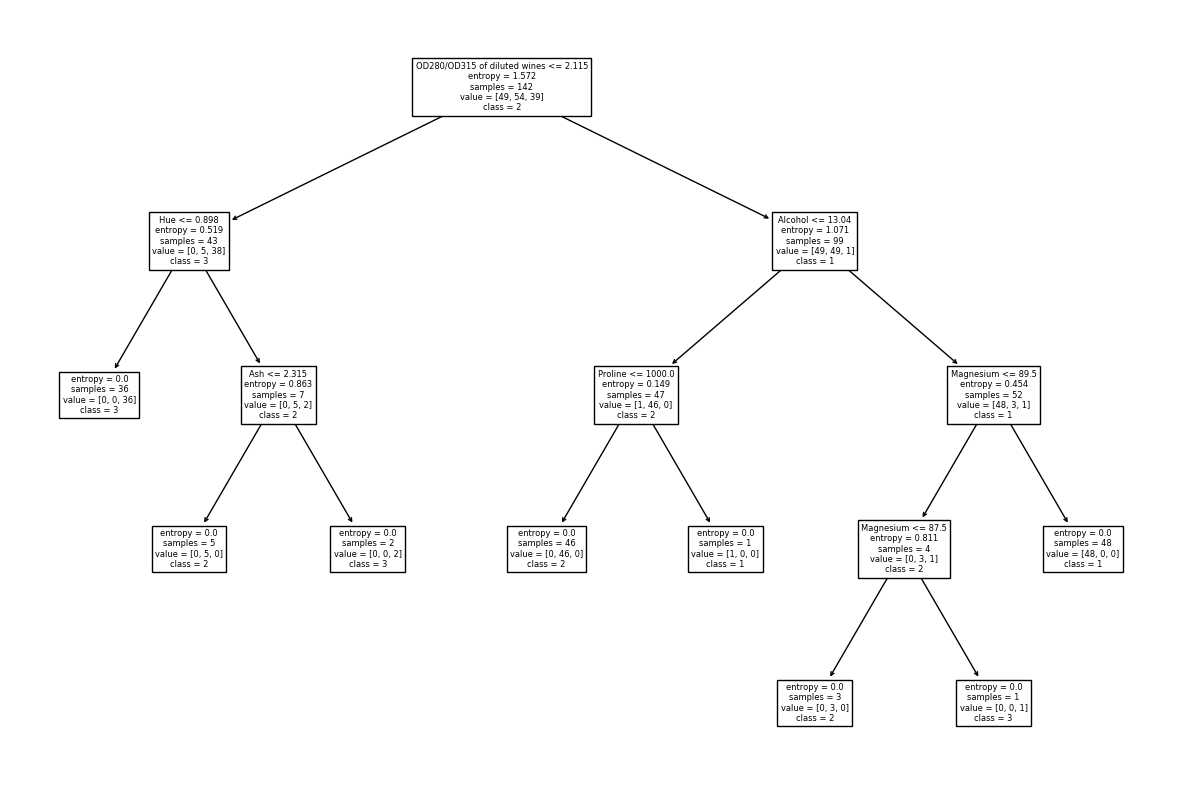

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(tree,max_depth=5,feature_names=['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline'], class_names=['1','2','3'])

In [149]:
feat=df.drop("class",axis=1).columns
feat=np.array(feat)

In [38]:
y_test.unique()

array([3, 1, 2], dtype=int64)

In [68]:
for content in df.items():
    if(pd.api.types.is_numeric_dtype(content)):
        df["class"]=content.astype("str")

In [69]:
df.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

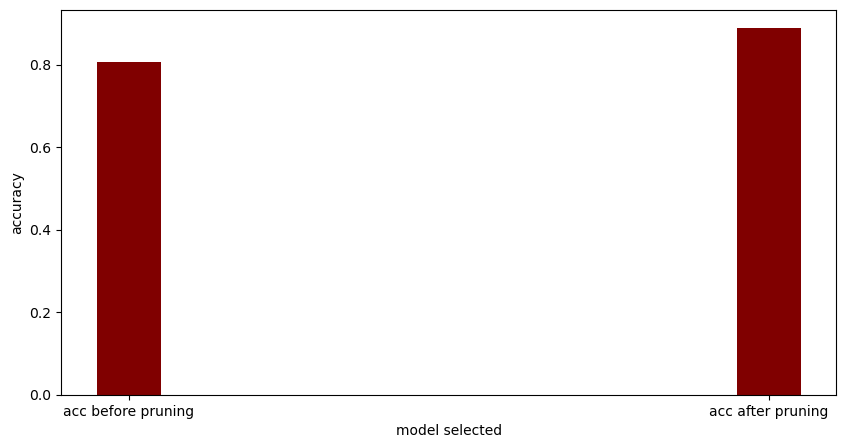

In [100]:
np.random.seed(3)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
# Compute the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Set the ccp_alpha parameter
clf=DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha)

# Re-fit the tree
clf.fit(x_train, y_train)
y_preds=clf.predict(x_test)
acc1=accuracy_score(y_true=y_test,y_pred=y_preds)
acc1
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
data = {'acc before pruning':acc, 'acc after pruning':acc1}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='maroon', 
        width=0.1,align='center')
plt.xlabel("model selected")
plt.ylabel("accuracy");

### 2.) CART 

In [114]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
cart=DecisionTreeClassifier(criterion='gini',splitter='best')
cart.fit(x_train,y_train)
y_preds=cart.predict(x_test)
acc_cart=accuracy_score(y_pred=y_preds,y_true=y_test)
acc_cart

0.9166666666666666

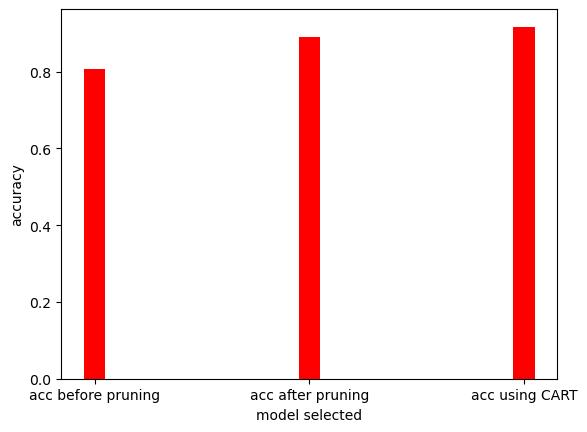

In [115]:
data = {'acc before pruning':acc, 'acc after pruning':acc1,'acc using CART':acc_cart}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='red', 
        width=0.1,align='center')
plt.xlabel("model selected")
plt.ylabel("accuracy");

[Text(0.375, 0.9, 'Color intensity <= 3.46\ngini = 0.661\nsamples = 142\nvalue = [49, 54, 39]\nclass = 2'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]\nclass = 2'),
 Text(0.5, 0.7, 'Flavanoids <= 1.785\ngini = 0.575\nsamples = 97\nvalue = [49, 9, 39]\nclass = 1'),
 Text(0.25, 0.5, 'Hue <= 0.97\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = 3'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = 3'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 2'),
 Text(0.75, 0.5, 'Proline <= 747.0\ngini = 0.241\nsamples = 57\nvalue = [49, 8, 0]\nclass = 1'),
 Text(0.625, 0.3, 'Alcohol <= 13.175\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]\nclass = 2'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]\nclass = 2'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]\nclass = 1')]

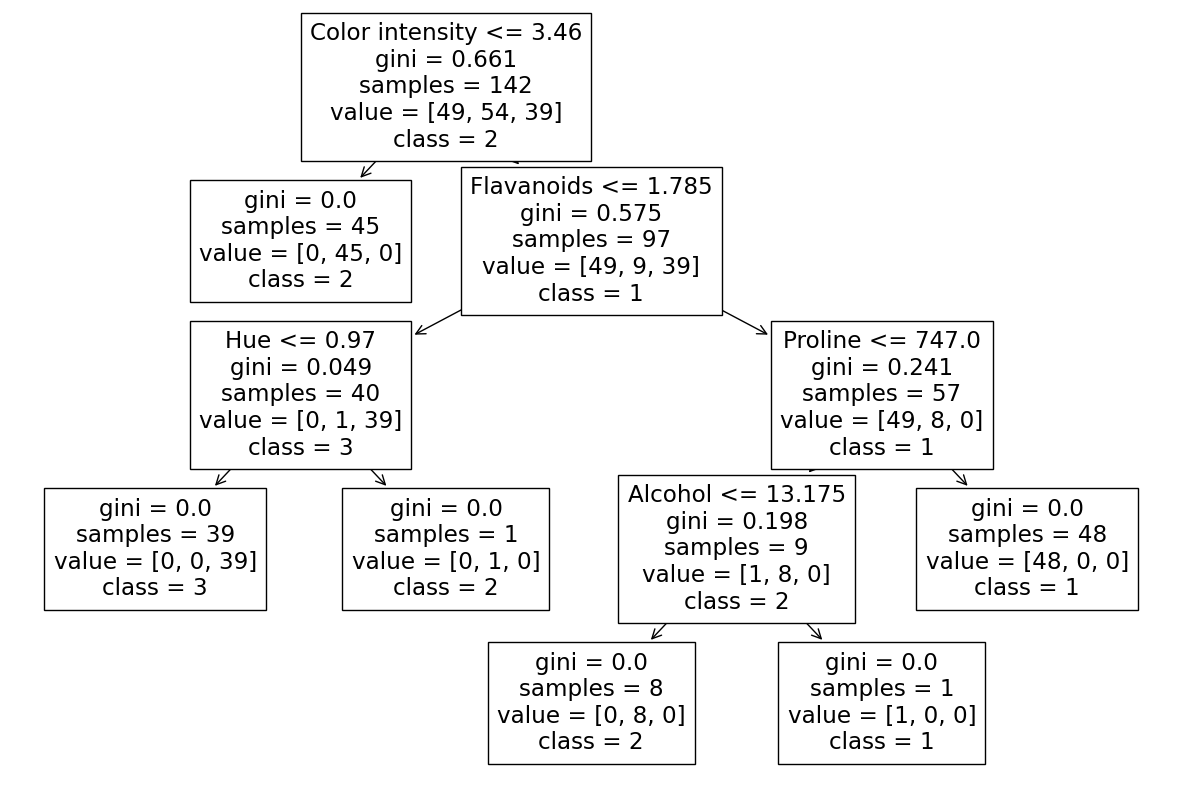

In [112]:
plt.figure(figsize=(15,10))
plot_tree(cart,max_depth=5,feature_names=['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline'], class_names=['1','2','3'])

### Get feature Importances

In [154]:
feat_imp=cart.feature_importances_
feat_imp

array([0.01894375, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42652824, 0.        , 0.        , 0.40612801,
       0.02077893, 0.        , 0.12762107])

In [150]:
feat

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype=object)

In [170]:
feat_importance=pd.DataFrame(np.array(feat_imp),np.array(feat),columns=["importance"])

In [183]:
feat_importance.sort_values(by=['importance'],ascending=False)

,importance
Flavanoids,0.426528
Color intensity,0.406128
Proline,0.127621
Hue,0.020779
Alcohol,0.018944
Malic acid,0.000000
Ash,0.000000
Alcalinity of ash,0.000000
Magnesium,0.000000
Total phenols,0.000000


# Titanic data

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

## Remove name and target variables

In [319]:
df=df.drop(["Name","Cabin"],axis=1)
df1=df1.drop(["Name","Cabin"],axis=1)

In [320]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

## Fill Missing values

### Fill age

In [321]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df1["Age"].fillna(df1["Age"].mean(),inplace=True) 

### Drop the 2 rows having null embarked values

In [322]:
df.dropna(inplace=True)

In [325]:
df1["Fare"].fillna(df1["Fare"].mean(),inplace=True)
df1.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Drop Tickets column as it is not important

In [326]:
df=df.drop("Ticket",axis=1)
df1=df1.drop("Ticket",axis=1)

## Convert male and female into categories
## Also convert 3 categories (S,C,Q) of Embarked  to numeric values

In [327]:
for column,content in df.items():
    if not (pd.api.types.is_numeric_dtype(content)):
        df[column]=content.astype("category").cat.as_ordered()
        
        
for column,content in df1.items():
    if not (pd.api.types.is_numeric_dtype(content)):
        df1[column]=content.astype("category").cat.as_ordered()

In [328]:
for column,content in df.items():
    if not (pd.api.types.is_numeric_dtype(content)):
        df[column]=pd.Categorical(content).codes+1
        
        
for column,content in df1.items():
    if not (pd.api.types.is_numeric_dtype(content)):
        df1[column]=pd.Categorical(content).codes+1

In [341]:
x_train=df.drop("Survived",axis=1)
y_train=df["Survived"]

x_test=df1
y_test=pd.read_csv("gender_submission.csv").drop("PassengerId",axis=1)

In [342]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree=DecisionTreeClassifier(criterion='entropy',splitter='best')
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [343]:
y_preds=tree.predict(x_test)

In [344]:
acc=accuracy_score(y_true=y_test,y_pred=y_preds)
acc

0.7416267942583732

In [345]:
len(x_test)

418

In [346]:
len(y_test)

418

In [347]:
y_test.dtypes

Survived    int64
dtype: object

[Text(0.5, 0.9, 'Pclass <= 1.5\nentropy = 0.96\nsamples = 889\nvalue = [549, 340]\nclass = 0'),
 Text(0.25, 0.7, 'Survived <= 2.5\nentropy = 0.826\nsamples = 312\nvalue = [81, 231]\nclass = 1'),
 Text(0.125, 0.5, 'Parch <= 28.856\nentropy = 0.301\nsamples = 168\nvalue = [9, 159]\nclass = 1'),
 Text(0.0625, 0.3, 'Parch <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]\nclass = 1'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Sex <= 2.5\nentropy = 0.144\nsamples = 98\nvalue = [2, 96]\nclass = 1'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Parch <= 23.35\nentropy = 1.0\nsamples = 144\nvalue = [72, 72]\nclass = 0'),
 Text(0.3125, 0.3, 'Sex <= 36.5\nentropy = 0.977\nsamples = 117\nvalue = [48, 69]\nclass = 1'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'PassengerId <= 322.0\nentropy = 0.503\nsamples = 27\nvalue = [24, 3]\nclass

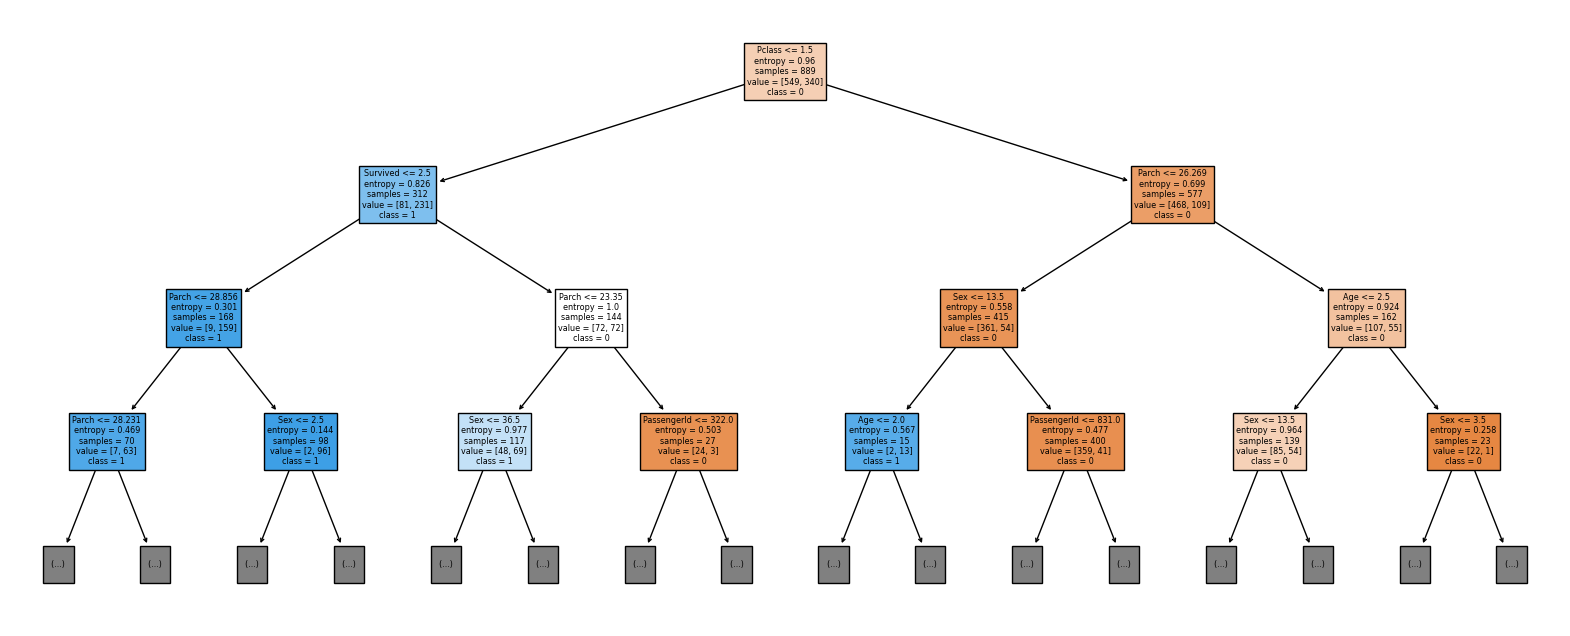

In [386]:
fig = plt.figure(figsize = (20,8))
plot_tree(tree,feature_names=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],class_names=['0','1'],max_depth=3,filled=True)

In [356]:
feat_imp=tree.feature_importances_
feat_imp

array([0.20362327, 0.10002217, 0.22506571, 0.21809797, 0.039202  ,
       0.01617318, 0.18724073, 0.01057497])

In [361]:
feat_name=x_train.columns
features=pd.DataFrame(np.array(feat_imp),np.array(feat_name),columns=["importance"])
features.sort_values("importance",ascending=False)

,importance
Sex,0.225066
Age,0.218098
PassengerId,0.203623
Fare,0.187241
Pclass,0.100022
SibSp,0.039202
Parch,0.016173
Embarked,0.010575


### Plot accuracy

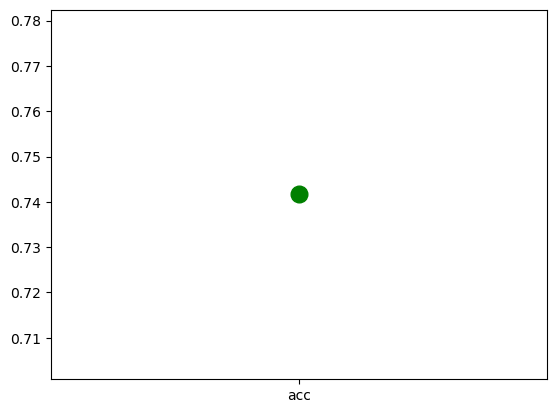

In [375]:
accuracy={"acc":acc}
plt.plot(accuracy.keys(),accuracy.values(),color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)